# 적대적 생성 신경망(Generative Adversarial Networks, GAN)

- 2014년, Ian Goodfellow 소개

- VAE와는 다른 방법으로 이미지 잠재 공간을 학습

- 직관적으로 이해하는 방법

  - 가짜 피카소 그림을 그리는 위조범과 이를 판별하는 판매상의 관계

  - 위조품과 진짜 그림을 섞어서 판매상에게 보여주며  
    그림이 진짜인지 가짜인지 판매상은 판별하고 이를 위조범에게 피드백

  - 처음에는 형편없는 그림을 그리다가 점점 피카소의 스타일을 모방하게 되고  
    판매상은 위조품을 구분하는데 점점 더 전문가가 되어감

- GAN의 네트워크

  - 생성자 네트워크(generator network)

    - 랜덤 벡터(잠재 공간의 무작위한 포인트)를 입력으로 받아 이를 합성된 이미지로 디코딩

  - 판별자 네트워크(discriminator netowrk)

    - 이미지(실제 또는 가짜 이미지)를 입력으로 받아 훈련 세트에서 온 이미지인지 생성자가 만든 이미지인지 판별

- GAN은 최적화의 최솟값이 고정되어 있지 않음

  - 보통의 경사하강법은 **고정된 손실공간**에서 언덕을 내려오는 훈련 방법이지만  
    GAN은 매 단계가 조금씩 전체 공간을 바꾸기 때문에 최적화 과정이 최솟값을 찾는 것이 어려움

  - 두 힘간의 평형점을 찾는 시스템

  - 따라서, 학습과정이 매우 어려움  
    즉, 적절한 파라미터를 찾고 조정해야함
  
  <img src="https://paperswithcode.com/media/methods/gan.jpeg">

  <sub>[이미지 출처] https://paperswithcode.com/method/gan</sub>

documentation : https://www.tensorflow.org/tutorials/generative/style_transfer

https://pseudo-lab.github.io/Tutorial-Book/chapters/GAN/Ch1-Introduction.html

GAN 활용 : https://www.spri.kr/posts/view/21883?code=industry_trend

https://process-mining.tistory.com/169

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DCGAN

MLP을 사용한 GAN vs. DCGAN<br>

DCGAN - Deep Convolutional generative adversarial network <br>
https://github.com/effectivemadness/celebA_gan<br>
https://velog.io/@wo7864/DCGAN-%EC%BD%94%EB%93%9C%EB%A5%BC-%ED%86%B5%ED%95%9C-%EC%9D%B4%ED%95%B4

**CelebA 데이터 다운로드**

로컬에서 실행하는 경우 `pip install gdown` 명령으로 gdown 패키지를 먼저 설치해 주세요.

In [ ]:
!mkdir celeba_gan
!wget "https://drive.google.com/uc?id=1up5bN8LCE2vHigVY-Z9yY2_aKRW5jN_9&confirm=t" -O celeba_gan/data.zip
!unzip -qq celeba_gan/data.zip -d celeba_gan

--2023-01-20 00:55:10--  https://drive.google.com/uc?id=1up5bN8LCE2vHigVY-Z9yY2_aKRW5jN_9&confirm=t
Resolving drive.google.com (drive.google.com)... 74.125.68.102, 74.125.68.100, 74.125.68.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.68.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pfvotj8khvgs5vc92ku00ltbukdv9uoi/1674176100000/10613826186492816817/*/1up5bN8LCE2vHigVY-Z9yY2_aKRW5jN_9?uuid=9155e0b7-c426-444b-a4d2-d8f3fb615450 [following]
--2023-01-20 00:55:11--  https://doc-04-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pfvotj8khvgs5vc92ku00ltbukdv9uoi/1674176100000/10613826186492816817/*/1up5bN8LCE2vHigVY-Z9yY2_aKRW5jN_9?uuid=9155e0b7-c426-444b-a4d2-d8f3fb615450
Resolving doc-04-a4-docs.googleusercontent.com (doc-04-a4-docs.googleusercontent.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to 

**이미지 디렉토리에서 데이터셋을 만듭니다**

In [ ]:
from tensorflow import keras
dataset = keras.utils.image_dataset_from_directory(
    "celeba_gan",
    label_mode=None,
    image_size=(64, 64),
    batch_size=32,
    smart_resize=True)

Found 202599 files belonging to 1 classes.


**픽셀 값 범위 바꾸기**

In [ ]:
dataset = dataset.map(lambda x: x / 255.)

**첫 번째 이미지 출력하기**

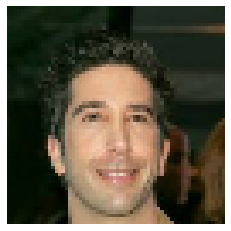

In [ ]:
import matplotlib.pyplot as plt
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break

In [ ]:
%pwd

'/content'

### 판별자

**GAN 판별자 네트워크**

Conv2D(filters, kernel_size, strides, padding)
  - filters: 출력의 채널 크기를 지정합니다. (nums, width, height, filters)
  - kernel_size: 합성곱 행렬의 크기를 지정합니다.
  - stides: 합성곱 행렬의 1 Step Size를 지정합니다.
  - padding: same → Input의 각 변에 padding을 추가합니다. 이 때, 입력의 width, height와 출력의 width, height가 같아집니다.

https://zzsza.github.io/data/2018/02/23/introduction-convolution/

In [ ]:
from tensorflow.keras import layers

discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

In [ ]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)            

### 생성자

**GAN 생성자 네트워크**

In [ ]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 256)      524544    
 ranspose)                                                       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 256)       0 

### 적대 네트워크

**GAN 모델**

Step One

batch_size 입력으로 받은 real_images의 개수를 저장합니다.

random_latent_vectors batch_size 만큼 generator에 입력할 latent_vector를 생성합니다.
ex) batch_size=512, latent_vector=128 일 때, (512, 128) 크기의 random vector 생성

generated_images generator에 latent_vector를 입력하여 가짜 이미지를 생성합니다.

combined_images 실제 이미지와 가짜 이미지를 연결하여 하나의 텐서로 만듭니다.

labels 실제 이미지와 가짜 이미지는 모두 batch_size만큼 있습니다. 실제 이미지에는 1을, 가짜 이미지에는 0을 할당 할 텐서를 만듭니다.

labels += 0.05 * tf.random.uniform(tf.shape(labels))
labels는 현재 0 또는 1의 값을 가지고 있습니다. 여기에 0.05*Random(0~1) 값을 더하여 약간씩 다르게합니다. discriminator의 학습에만 사용되는데 Noise를 추가함으로 판별능력을 키울 수 있는 것 같습니다.
매우 중요한 트릭이라고하는데, 어떻게 성능을 향상 시킬 수 있는지 이유는 모르겠네요.

Step Two

이전 GAN 의 가중치 갱신부와 같습니다.
다만, 이전에 선언한 labels 는 discriminator에 새로 선언한 정수만을 가지고 있는 misleading_labels 는 generator의 학습에 사용된다는 점이 다릅니다.

d_loss와 g_loss를 반환하고 함수를 종료합니다.

In [ ]:
import tensorflow as tf
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()  # 상속받은 keras.Model Class의 생성자를 실행
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    # property decorator로 메소드를 속성으로 선언
    # compile에서 선언한 d_loss_metric 와 g_loss_metric 속성을 List로 반환
    @property 
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0] # real_images의 개수를 저장
        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim))
        
        # Decode them to fake images, generator에 latent_vector를 입력하여 가짜 이미지를 생성
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images, 실제 이미지와 가짜 이미지를 연결하여 하나의 텐서로 만듬 
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images 
        # 실제 이미지와 가짜 이미지는 모두 batch_size만큼 있습니다. 실제 이미지에는 1을, 가짜 이미지에는 0을 할당 할 텐서를 만듬
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))],
            axis=0
        )

        # Add random noise to the labels - important trick!, discriminator의 학습에만 사용되는데 Noise를 추가함으로 판별능력을 키울 수 있음 
        labels += 0.05 * tf.random.uniform(tf.shape(labels)) # 랜덤 균일분포 난수 함수

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(
                self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(
            zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(),
                "g_loss": self.g_loss_metric.result()}

**훈련 과정 동안에 이미지를 생성하기 위한 콜백**

Callback 사용하기 - 커스텀 콜백 / 모델 학습 / 평가<br>
https://littlefoxdiary.tistory.com/87

keras.callbacks.Callback
콜백 객체를 생성

API에 명시된 함수를 작성하면, 지정한 학습과정에서 콜백함수를 호출 할 수 있으며 코드에서는 on_epoch_end 즉, epoch가 끝날 때 마다 함수를 실행

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None): # epoch가 끝날 때 마다 함수를 실행
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save(f"generated_img_{epoch:03d}_{i}.png")

**GAN 모델 컴파일하고 훈련하기**

In [ ]:
epochs = 30

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)

Epoch 1/30
6332/6332 [==============================] - 201s 30ms/step - d_loss: 0.5868 - g_loss: 1.3681
Epoch 2/30
6332/6332 [==============================] - 189s 30ms/step - d_loss: 0.6567 - g_loss: 1.0703
Epoch 3/30
6332/6332 [==============================] - 189s 30ms/step - d_loss: 0.6746 - g_loss: 0.9613
Epoch 4/30
6332/6332 [==============================] - 189s 30ms/step - d_loss: 0.6590 - g_loss: 1.0170
Epoch 5/30
6332/6332 [==============================] - 188s 30ms/step - d_loss: 0.6363 - g_loss: 1.1069
Epoch 6/30
6332/6332 [==============================] - 188s 30ms/step - d_loss: 0.6471 - g_loss: 1.0108
Epoch 7/30
6332/6332 [==============================] - 189s 30ms/step - d_loss: 0.6729 - g_loss: 0.9208
Epoch 8/30
6332/6332 [==============================] - 189s 30ms/step - d_loss: 0.6761 - g_loss: 0.8985
Epoch 9/30
6332/6332 [==============================] - 189s 30ms/step - d_loss: 0.6789 - g_loss: 0.9101
Epoch 10/30
6332/6332 [==============================] 

In [ ]:
!cp /content/generated_img_029_9.png /content/drive/MyDrive/cakd8/강의/vision/gan_images

In [ ]:
!ls

celeba_gan		 generated_img_009_9.png  generated_img_020_0.png
drive			 generated_img_010_0.png  generated_img_020_1.png
generated_img_000_0.png  generated_img_010_1.png  generated_img_020_2.png
generated_img_000_1.png  generated_img_010_2.png  generated_img_020_3.png
generated_img_000_2.png  generated_img_010_3.png  generated_img_020_4.png
generated_img_000_3.png  generated_img_010_4.png  generated_img_020_5.png
generated_img_000_4.png  generated_img_010_5.png  generated_img_020_6.png
generated_img_000_5.png  generated_img_010_6.png  generated_img_020_7.png
generated_img_000_6.png  generated_img_010_7.png  generated_img_020_8.png
generated_img_000_7.png  generated_img_010_8.png  generated_img_020_9.png
generated_img_000_8.png  generated_img_010_9.png  generated_img_021_0.png
generated_img_000_9.png  generated_img_011_0.png  generated_img_021_1.png
generated_img_001_0.png  generated_img_011_1.png  generated_img_021_2.png
generated_img_001_1.png  generated_img_011_2.png  generated_img_02